## Exercise 10.37: Correlation in returns from different stocks
### What do we know?
- There are 4 stocks with normally distributed percentage returns.
- The mean percentage returns by stock:    0.080, 0.095, 0.115, 0.145
- The return standard deviation by stock:  0.060, 0.080, 0.140, 0.195
- In any given year, the correlation among each pair of stocks follows:
  - rho12 = 0.55, rho13 = 0.65, rho14 = 0.45
  - rho23 = 0.50, rho24 = 0.70
  - rho34 = 0.55
- Generate a sample of stock returns and compute the correlation coefficients for each pair of stocks in your sample. Check if they are close to the above correlations.
  - For this problem, there is an incomplete Python implementation that includes a function to compute correlations. The main task for the problem is to create the code that will generate the correlated random returns.
- **Side note**: The learning objective of this problem in the book is to learn about an additional parameter in a particular function (i.e., function RISKCORRMAT that is part of @Risk). This is not relevant for our purposes. The learning objective for this Python-based problem is to (1) reinforce Python syntax for generating correlated normal random variables, (2) introduce code for computing correlations in a sample.
  
### Model elements
**Deterministic model**\
<u>Inputs and Outputs</u>\
Ri = return of stock i, i = 1, 2, 3, 4

**Stochastic elements**\
Ri is normal with mean and standard deviation listed above\
We can use the NumPy function 'np.random.multivariate_normal' to generate the sample of correlated returns.

In [12]:
# Import libraries that may be used
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt

In [13]:
def simStats(Z_df):
    '''Generic code to compute summary stats for each column in a data frame (input as Z_df)'''
    # Compute sample mean, sample stdev, standard error, min, max
    Mean = Z_df.mean()
    Stdev = Z_df.std(ddof=1)              # Reduce degrees of freedom (ddof) by 1 to yield sample stdev
    Quant05 = Z_df.quantile(0.05)
    Quant95 = Z_df.quantile(0.95)
    Stderr = Z_df.sem()
    Min = Z_df.min()
    Max = Z_df.max()

    # Specify probability for confidence interval of sample mean
    CI_prob = 0.95

    # Compute confidence interval
    Tail_prob = (1 - CI_prob)/2
    z = sp.norm.ppf(1-Tail_prob)
    CI_lo = Mean - z * Stderr
    CI_hi = Mean + z * Stderr
    
    # Create & return data frame of sample statistics
    Sample_stats = pd.concat([Mean,Stdev,Quant05,Quant95,Stderr,CI_lo,CI_hi,Min,Max],axis=1)
    Sample_stats.columns = ['Sample mean', 'Sample stdev', 'Quantile 0.05','Quantile 0.95',
                            'Std error','CI-lo','CI-hi','Min','Max']
    return Sample_stats

def simHistogram(Z_df):
    '''
    Generic code to plot histograms for each column in a data frame Z_df

    '''
    # Iterate over columns
    for column in Z_df.columns:
        # Clear previous plot
        plt.clf()

        # Generate histogram for current column
        plt.hist(Z_df[column], bins='auto', edgecolor='black',density=True)

        # Set labels and title
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        
        # Display the histogram
        plt.show()

def simCorr(Z_df):
    '''Generic code to compute Pearson correlation coefficients 
       among each pair of columns in a data frame (input as Z_df)'''
    # Compute the correlation matrix
    Corr_mat = Z_df.corr(method='pearson')
    return Corr_mat

### Code for the problem (incomplete)

In [14]:
def simShell(controls,inputs):
    '''
    Generic sim code: specifies deterministic model, sets some inputs as random,
    returns random sample of model outputs stored as a data frame
    
    '''
    #A Unpack the controls (standardized)
    seed = controls[0]               # Determines whether common seed is used
    n = controls[1]                  # Sample size

    #B Unpack the inputs (model-dependent)
    means = inputs['means']
    std_devs = inputs['std_devs']
    corr_matrix = inputs['corr_matrix']

    #C Use same seed (true) or not (false) for random number streams
    if seed:
        np.random.seed(10)

    #D Generate sample(s) of random inputs & outputs (eg, in arrays)
    cov_matrix = np.outer(std_devs, std_devs) * corr_matrix
    Z = np.random.multivariate_normal(means, cov_matrix, n)

    #E Store array of outputs (& desired inputs) in data frame & return
    return pd.DataFrame(Z, columns=['Stk 1', 'Stk 2', 'Stk 3', 'Stk 4'])

In [15]:
# Simulation control parameters 
## common seed indicator, sample size
controls = [True, 1000]

# Model inputs (parameters & decision variables)
inputs = {
    'means': [0.080, 0.095, 0.115, 0.145],
    'std_devs': [0.060, 0.080, 0.140, 0.195],
    'corr_matrix': np.array([
        [1.00, 0.55, 0.65, 0.45],
        [0.55, 1.00, 0.50, 0.70],
        [0.65, 0.50, 1.00, 0.55],
        [0.45, 0.70, 0.55, 1.00]
    ])
}

# Generate the sample & display summary stats
Z_df = simShell(controls, inputs)      # Generate random sample of outputs
print('Sample statistics for each stock:')
display(simStats(Z_df))
print('Correlation matrix:')
display(simCorr(Z_df))

Sample statistics for each stock:


,Sample mean,Sample stdev,Quantile 0.05,Quantile 0.95,Std error,CI-lo,CI-hi,Min,Max
Stk 1,0.079460,0.060502,-0.022977,0.176351,0.001913,0.075711,0.083210,-0.086898,0.266852
Stk 2,0.097141,0.080383,-0.039324,0.229282,0.002542,0.092159,0.102123,-0.189216,0.342932
Stk 3,0.109636,0.139975,-0.116165,0.340430,0.004426,0.100960,0.118311,-0.283056,0.579853
Stk 4,0.149823,0.195427,-0.154247,0.462329,0.006180,0.137710,0.161935,-0.480371,0.730825


Correlation matrix:


,Stk 1,Stk 2,Stk 3,Stk 4
Stk 1,1.000000,0.573530,0.671537,0.463221
Stk 2,0.573530,1.000000,0.522789,0.702326
Stk 3,0.671537,0.522789,1.000000,0.580208
Stk 4,0.463221,0.702326,0.580208,1.000000


Histograms of stock returns:


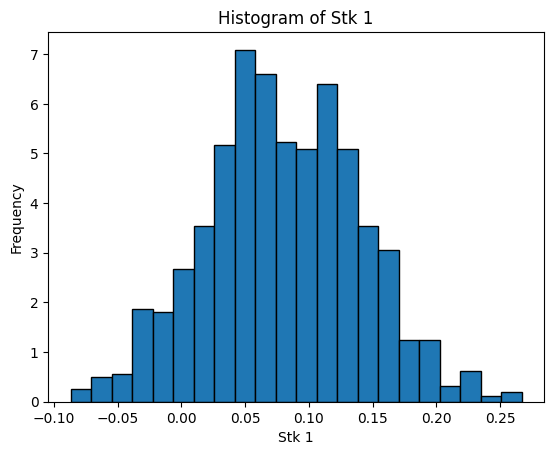

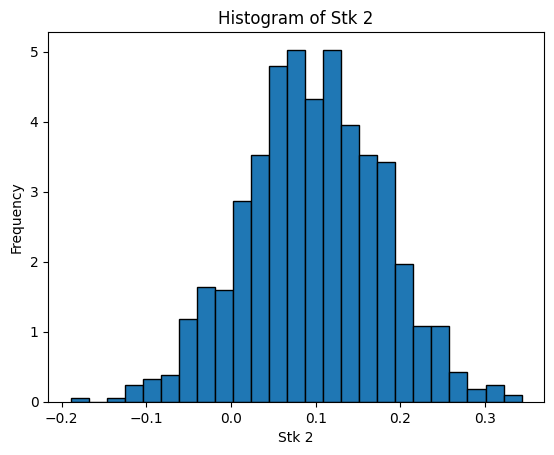

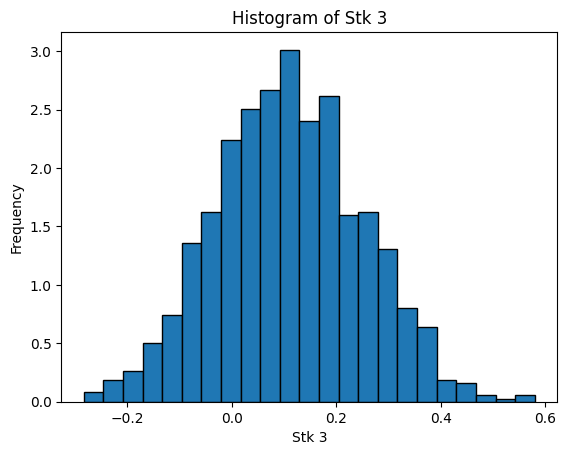

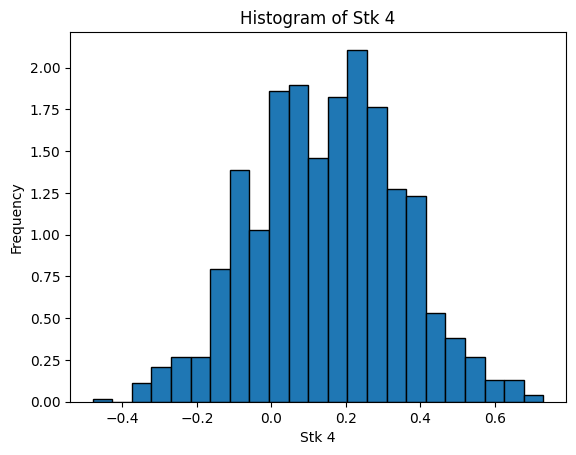

In [16]:
print("Histograms of stock returns:")
simHistogram(Z_df)